In [1]:
## Problem Statement:- To Classify Handwritten Digits (0-9).

In [2]:
# Importing important libraries
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns
#!pip install tensorflow
import tensorflow as tf
import random

from tensorflow import keras
from keras.datasets import mnist # to fetch mnist dataset

from tensorflow.keras.optimizers import Adam
from keras.utils.np_utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
# Get the working directory path
import os
current_dir = os.getcwd()

# Load the data from mnist .
mnist.load_data()      # .load data() method returns both training and testing dataset.

((array([[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         ...,
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0

In [4]:
# Split the data into train and test data.
(x_train, y_train), (x_test, y_test) = mnist.load_data()

## About Dataset
This MNIST (Modified National Institute of Standards and Tecnology) database of Handwritten Digits.
The full dataset consist of 60,000 training samples and 10,000 test samples of images that is 28*28 pixels wide.

In [5]:
## BASIC CHECK

In [6]:
# To know shape of data.
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


### Here 28*28 pixel image data is splitted into 60000 train data and 10000 test data.

In [7]:
## EDA

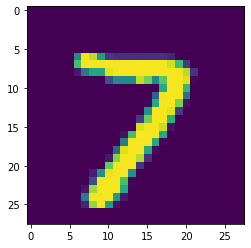

In [8]:
# to display the image .imshow() method is used.
plt.imshow(x_train[4000]) 
plt.show()

2


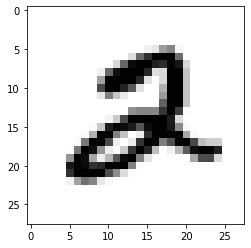

In [9]:
#checking the graph how does the data look like
plt.imshow(x_train[5],cmap =plt.cm.binary) #this is binary image and its size is 28*28
print(y_train[5]) # To print the label of x_train image

In [10]:
#checking the value of each pixel before normalization
print (x_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

In [11]:
# Checking the value of dependent variable in dataset.
image_index =400
print(y_train[:image_index + 1])

[5 0 4 1 9 2 1 3 1 4 3 5 3 6 1 7 2 8 6 9 4 0 9 1 1 2 4 3 2 7 3 8 6 9 0 5 6
 0 7 6 1 8 7 9 3 9 8 5 9 3 3 0 7 4 9 8 0 9 4 1 4 4 6 0 4 5 6 1 0 0 1 7 1 6
 3 0 2 1 1 7 9 0 2 6 7 8 3 9 0 4 6 7 4 6 8 0 7 8 3 1 5 7 1 7 1 1 6 3 0 2 9
 3 1 1 0 4 9 2 0 0 2 0 2 7 1 8 6 4 1 6 3 4 5 9 1 3 3 8 5 4 7 7 4 2 8 5 8 6
 7 3 4 6 1 9 9 6 0 3 7 2 8 2 9 4 4 6 4 9 7 0 9 2 9 5 1 5 9 1 2 3 2 3 5 9 1
 7 6 2 8 2 2 5 0 7 4 9 7 8 3 2 1 1 8 3 6 1 0 3 1 0 0 1 7 2 7 3 0 4 6 5 2 6
 4 7 1 8 9 9 3 0 7 1 0 2 0 3 5 4 6 5 8 6 3 7 5 8 0 9 1 0 3 1 2 2 3 3 6 4 7
 5 0 6 2 7 9 8 5 9 2 1 1 4 4 5 6 4 1 2 5 3 9 3 9 0 5 9 6 5 7 4 1 3 4 0 4 8
 0 4 3 6 8 7 6 0 9 7 5 7 2 1 1 6 8 9 4 1 5 2 2 9 0 3 9 6 7 2 0 3 5 4 3 6 5
 8 9 5 4 7 4 2 7 3 4 8 9 1 9 2 8 7 9 1 8 7 4 1 3 1 1 0 2 3 9 4 9 2 1 6 8 4
 7 7 4 4 9 2 5 7 2 4 4 2 1 9 7 2 8 7 6 9 2 2 3 8 1 6 5 1 1 0 2]


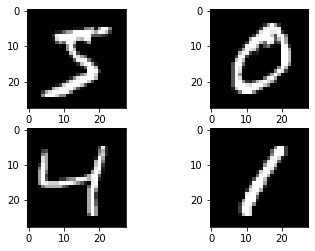

In [12]:
# plot 4 images as gray scale
plt.subplot(221)
plt.imshow(x_train[0], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(x_train[1], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(x_train[2], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(x_train[3], cmap=plt.get_cmap('gray'))

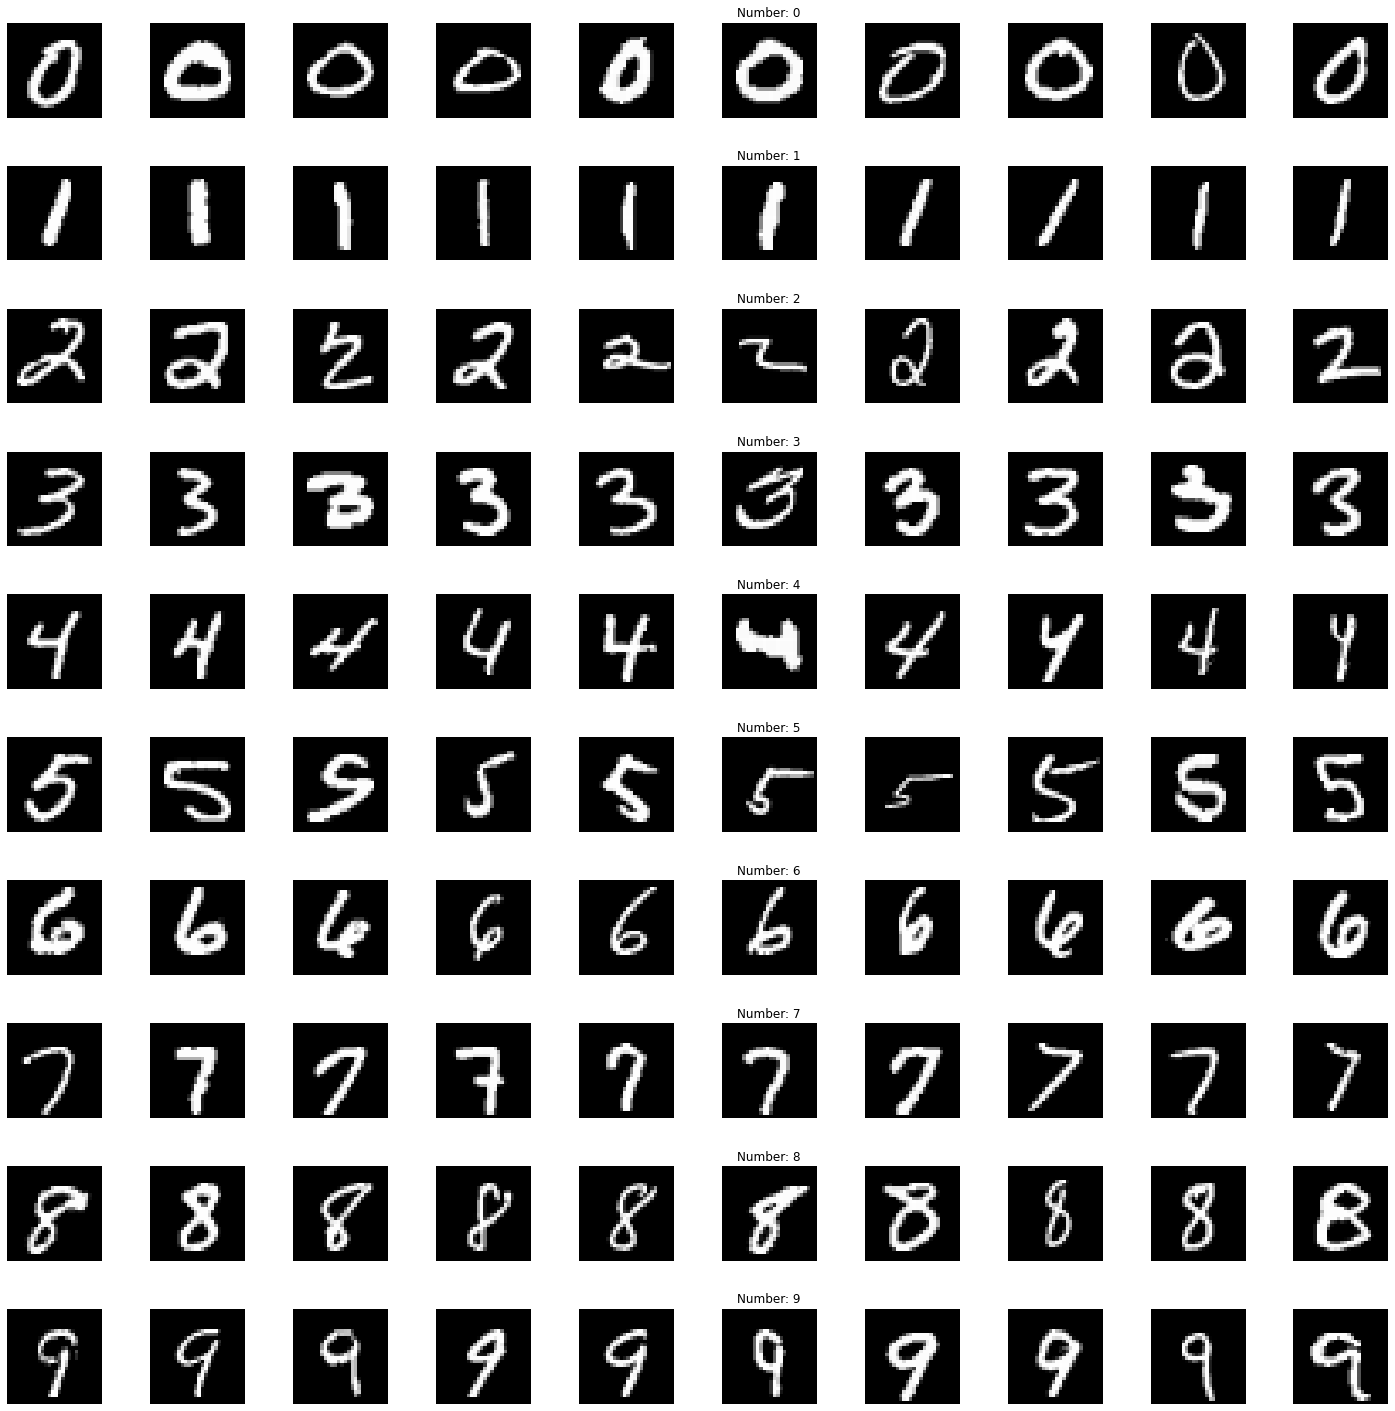

In [13]:

# Define a grid for better visualization of data in grid arrangement of 10x10.
num_of_sample= []
num_cols = 10  # Different classes of each digits are defined i.e.more than 1000, but we are just choosing 10 
num_class = 10  # Number of digits from 0 to 9

fig,axs = plt.subplots(nrows = num_class, ncols = num_cols, figsize = (20,20))
fig.tight_layout()

for i in range(num_cols):
    for j in range(num_class):
        x_select = x_train[y_train == j]
        import random
        axs[j][i].imshow(x_select[random.randint(0, len(x_select-1)),:,:], cmap=plt.get_cmap("gray"))
        axs[j][i].axis("off") # Only digits pixel will be displayed.
        if i == 5:
            axs[j][i].set_title('Number: '+ str(j)) # Display target value above the image.
            num_of_sample.append(len(x_select))

In [14]:
print(num_of_sample)   # To check number of handwritten digits from training data.

[5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]


Text(0, 0.5, 'num_of_images')

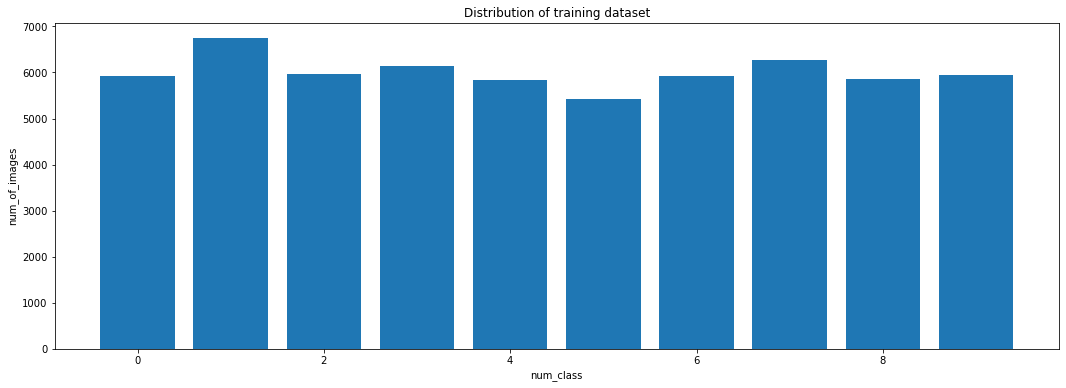

In [15]:
# To check distribution of handwritten digit images from training dataset in bar graph.
plt.figure(figsize= (18,6))
plt.bar(range(0,num_class),num_of_sample)
plt.title("Distribution of training dataset")
plt.xlabel("num_class")
plt.ylabel("num_of_images")

From the above graph it depicts that highest number of images(more than 6500) belongs to num_calss 1.

In [16]:
## Data Preprocessing

In [17]:
#creating a simple multi-layer perceptron model
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import np_utils

In [18]:
# flatten 28*28 images to a 784 vector for each image
num_pixels = x_train.shape[1] * x_train.shape[2]
x_train = x_train.reshape((x_train.shape[0], num_pixels)).astype('float32')
x_test = x_test.reshape((x_test.shape[0], num_pixels)).astype('float32')

In [19]:
# normalize inputs from 0-255 to 0-1
x_train = x_train / 255   # Since RGB values can range from 0 to 255,so divide each pixel value by 255.
x_test = x_test / 255

In [20]:
#To convert the dependent variable in the form of integers to a binary class matrix.
# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]
num_classes

10

# Model development

In [21]:
# define baseline model for simple multi-layer perceptron model
def baseline_model():
	# create model
	model = Sequential()
	model.add(Dense(num_pixels, input_dim=num_pixels, kernel_initializer='normal', activation='relu'))
	model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))
	# Compile model
	model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model

In [22]:
# build the model
model = baseline_model()
# Fit the model
history= model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10, batch_size=200, verbose=2)
# Final evaluation of the model
scores = model.evaluate(x_test, y_test, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))
# Save the model for prediction
model1= model.save('test_model1.h5')

Epoch 1/10
300/300 - 5s - loss: 0.2830 - accuracy: 0.9190 - val_loss: 0.1512 - val_accuracy: 0.9548 - 5s/epoch - 15ms/step
Epoch 2/10
300/300 - 3s - loss: 0.1110 - accuracy: 0.9675 - val_loss: 0.0928 - val_accuracy: 0.9722 - 3s/epoch - 12ms/step
Epoch 3/10
300/300 - 4s - loss: 0.0701 - accuracy: 0.9803 - val_loss: 0.0755 - val_accuracy: 0.9772 - 4s/epoch - 12ms/step
Epoch 4/10
300/300 - 3s - loss: 0.0500 - accuracy: 0.9858 - val_loss: 0.0656 - val_accuracy: 0.9787 - 3s/epoch - 11ms/step
Epoch 5/10
300/300 - 3s - loss: 0.0377 - accuracy: 0.9894 - val_loss: 0.0674 - val_accuracy: 0.9783 - 3s/epoch - 11ms/step
Epoch 6/10
300/300 - 3s - loss: 0.0262 - accuracy: 0.9929 - val_loss: 0.0581 - val_accuracy: 0.9818 - 3s/epoch - 11ms/step
Epoch 7/10
300/300 - 3s - loss: 0.0191 - accuracy: 0.9953 - val_loss: 0.0587 - val_accuracy: 0.9817 - 3s/epoch - 11ms/step
Epoch 8/10
300/300 - 3s - loss: 0.0144 - accuracy: 0.9966 - val_loss: 0.0609 - val_accuracy: 0.9818 - 3s/epoch - 11ms/step
Epoch 9/10
300/3

In [23]:
# Final evaluation of the model
scores = model.evaluate(x_test, y_test, verbose=0)
print("CNN Error: %.2f%%" % (100-scores[1]*100))
#score =model.evaluate(X_test,y_test, verbose=0)
print('Test score:',scores[0])
print('Test accuracy:',scores[1])

CNN Error: 1.72%
Test score: 0.05719127133488655
Test accuracy: 0.9828000068664551


### Visualize Model_1 performance

Text(0.5, 0, 'epochs')

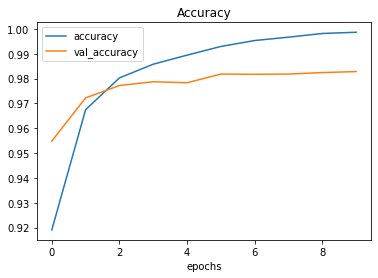

In [24]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['accuracy','val_accuracy'])
plt.title('Accuracy')
plt.xlabel('epochs')

Text(0.5, 0, 'epochs')

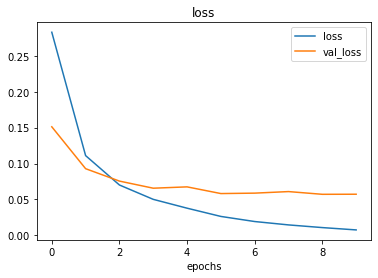

In [25]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss','val_loss'])
plt.title('loss')
plt.xlabel('epochs')

In [26]:
# Simple CNN for the MNIST Dataset
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# reshape to be [samples][width][height][channels]
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1)).astype('float32')
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1)).astype('float32')
# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255
# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]
# define a simple CNN model
def baseline_model():
	# create model
	model = Sequential()
	model.add(Conv2D(32, (5, 5), input_shape=(28, 28, 1), activation='relu'))
	model.add(MaxPooling2D())
	model.add(Dropout(0.2))
	model.add(Flatten())
	model.add(Dense(128, activation='relu'))
	model.add(Dense(num_classes, activation='softmax'))
# Compile model
	model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model
# build the model
model = baseline_model()
# Fit the model
history2= model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("CNN Error: %.2f%%" % (100-scores[1]*100))
# Save the model for prediction
model2= model.save('test2_model.h5')

Epoch 1/10
300/300 [==============================] - 25s 81ms/step - loss: 0.2386 - accuracy: 0.9310 - val_loss: 0.0915 - val_accuracy: 0.9730
Epoch 2/10
300/300 [==============================] - 23s 77ms/step - loss: 0.0760 - accuracy: 0.9773 - val_loss: 0.0562 - val_accuracy: 0.9813
Epoch 3/10
300/300 [==============================] - 23s 77ms/step - loss: 0.0537 - accuracy: 0.9837 - val_loss: 0.0452 - val_accuracy: 0.9857
Epoch 4/10
300/300 [==============================] - 23s 77ms/step - loss: 0.0412 - accuracy: 0.9873 - val_loss: 0.0434 - val_accuracy: 0.9855
Epoch 5/10
300/300 [==============================] - 24s 79ms/step - loss: 0.0326 - accuracy: 0.9900 - val_loss: 0.0359 - val_accuracy: 0.9876
Epoch 6/10
300/300 [==============================] - 23s 78ms/step - loss: 0.0275 - accuracy: 0.9913 - val_loss: 0.0346 - val_accuracy: 0.9880
Epoch 7/10
300/300 [==============================] - 24s 79ms/step - loss: 0.0230 - accuracy: 0.9930 - val_loss: 0.0351 - val_accuracy:

In [27]:
# Final evaluation of the model

print("CNN Error: %.2f%%" % (100-scores[1]*100))
score =model.evaluate(X_test,y_test, verbose=0)
print('Test score:',scores[0])
print('Test accuracy:',scores[1])

CNN Error: 0.95%
Test score: 0.03146704286336899
Test accuracy: 0.9904999732971191


### This slightly larger model achieves the respectable classification error rate of 0.99%.

In [28]:
### Visualize Model_2 performance

Text(0.5, 0, 'epochs')

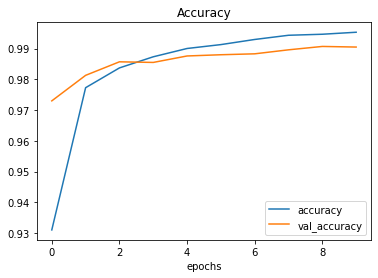

In [29]:
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.legend(['accuracy','val_accuracy'])
plt.title('Accuracy')
plt.xlabel('epochs')

Text(0.5, 0, 'epochs')

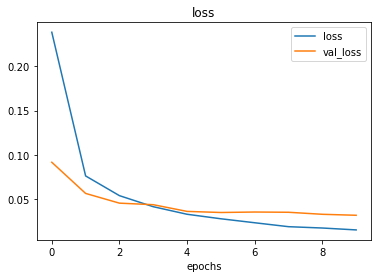

In [30]:
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.legend(['loss','val_loss'])
plt.title('loss')
plt.xlabel('epochs')

In [31]:
# Testing of Model

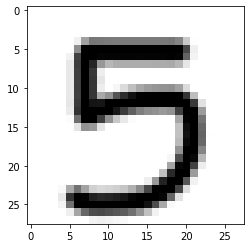

In [33]:
import imageio
im=imageio.imread("https://i.imgur.com/a3Rql9C.png")
plt.imshow(im, cmap = plt.get_cmap('gray'))

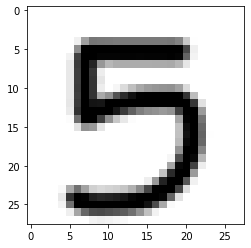

In [34]:
gray = np.dot(im[...,:3], [0.299, 0.587, 0.114])
plt.imshow(gray, cmap = plt.get_cmap('gray'))
plt.show()

In [35]:
# reshape the image
gray = gray.reshape(1, 28, 28, 1)
# Normalizing the image by scaling 
gray_scale= gray/255      

In [36]:
# load the model
from keras.models import load_model
model = load_model("test2_model.h5")

# predict digit
prediction = model.predict(gray)
print(prediction.argmax())

3


In [ ]:
### By Using opencv method

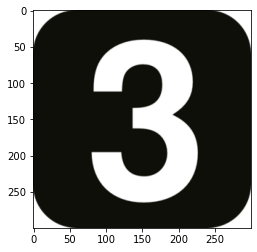

In [37]:
import io
import requests
import PIL
from PIL import Image

url = 'http://www.clker.com/cliparts/Q/v/R/1/g/M/number-3-simple-square-black-md.png'  #any image from internet URL can be pasted here
output = requests.get(url, stream=True)
img = Image.open(output.raw)
plt.imshow(img, cmap=plt.get_cmap('gray'))

(28, 28)


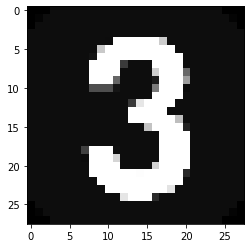

In [38]:
# resizing the raw image from its actual dimension to (28*28), since our model is trained and validated for 28*28 dimension

import cv2 
img = np.asarray(img)
resized = cv2.resize(img, (28, 28))
gray_sc = cv2.cvtColor(resized,cv2.COLOR_BGR2GRAY)    # to convert from 3D to 2D
print(gray_sc.shape)
plt.imshow(gray_sc,cmap=plt.get_cmap("gray"))

In [39]:
prediction=model.predict(gray) 
print("predicted digit:", str(prediction))

predicted digit: [[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]


In [40]:
prediction = model.predict(gray)
print(prediction.argmax())

3


In [ ]:
# As above models does not performed very well on some classes,Let's optimise the model

In [41]:
# Model3
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# reshape to be [samples][width][height][channels]
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1)).astype('float32')
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1)).astype('float32')
# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255
# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]
# define a simple CNN model
def baseline_model():
	# create model
	model = Sequential()
	model.add(Conv2D(32, (5, 5), input_shape=(28, 28, 1), activation='relu'))
	model.add(MaxPooling2D())
	model.add(Dropout(0.2))
	model.add(Flatten())
	model.add(Dense(100, activation='relu'))
	model.add(Dense(num_classes, activation='softmax'))
# Compile model
	model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model
# build the model
model3 = baseline_model()
# Fit the model
history3= model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("CNN Error: %.2f%%" % (100-scores[1]*100))
# Save the model for prediction
model3= model.save('test3_model.h5')

Epoch 1/10
300/300 [==============================] - 25s 82ms/step - loss: 0.0117 - accuracy: 0.9962 - val_loss: 0.0327 - val_accuracy: 0.9896
Epoch 2/10
300/300 [==============================] - 24s 80ms/step - loss: 0.0104 - accuracy: 0.9968 - val_loss: 0.0325 - val_accuracy: 0.9902
Epoch 3/10
300/300 [==============================] - 24s 79ms/step - loss: 0.0098 - accuracy: 0.9967 - val_loss: 0.0330 - val_accuracy: 0.9907
Epoch 4/10
300/300 [==============================] - 23s 78ms/step - loss: 0.0087 - accuracy: 0.9970 - val_loss: 0.0367 - val_accuracy: 0.9898
Epoch 5/10
300/300 [==============================] - 23s 78ms/step - loss: 0.0076 - accuracy: 0.9976 - val_loss: 0.0352 - val_accuracy: 0.9900
Epoch 6/10
300/300 [==============================] - 23s 78ms/step - loss: 0.0076 - accuracy: 0.9975 - val_loss: 0.0334 - val_accuracy: 0.9903
Epoch 7/10
300/300 [==============================] - 23s 78ms/step - loss: 0.0066 - accuracy: 0.9977 - val_loss: 0.0365 - val_accuracy:

In [42]:
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("CNN Error: %.2f%%" % (100-scores[1]*100))
#score =model.evaluate(X_test,y_test, verbose=0)
print('Test score:',scores[0])
print('Test accuracy:',scores[1])

CNN Error: 0.98%
Test score: 0.0378398522734642
Test accuracy: 0.9901999831199646


## Testing optmised Model  For Prediction 

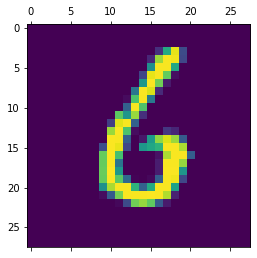

In [43]:
# Digit visualisation for prediction at index 50.
plt.matshow(X_test[50])

In [44]:
# Make the predictions
y_predicted = model.predict(X_test)
y_predicted[50]

array([5.3900187e-12, 8.1984701e-13, 4.0580973e-16, 1.5448141e-12,
       2.6290720e-11, 6.8758965e-08, 9.9999988e-01, 5.0793549e-20,
       3.0169856e-10, 7.7823981e-15], dtype=float32)

[5.3900187e-12 8.1984701e-13 4.0580973e-16 1.5448141e-12 2.6290720e-11
 6.8758965e-08 9.9999988e-01 5.0793549e-20 3.0169856e-10 7.7823981e-15]


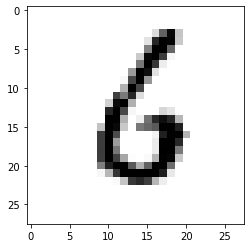

In [45]:
plt.imshow(X_test[50],cmap =plt.cm.binary) #this is binary image and its size is 28*28
print(y_predicted[50]) # To print the label of X_test image

## Conclusion
In this project, We applied deep learning concept and created a Neural network with Keras library using Tensorflow as backend to classify Handwritten Digits by using MNIST dataset.
Although we reached an accuracy of 98%, There are still opportunities for improvement.